- name: Jonathan Tuahta
- Batch: BSD-002
- Objective: this file purpose is to test the model that we make before

In [2]:
# import libraies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

import h5py

In [3]:
# load model
with h5py.File('best_model.h5', 'r') as f:
    model = load_model(f, compile=False)


In [10]:
urls = ['https://prod-images-static.radiopaedia.org/images/1429694/a9a1c70b1f38273499fdeffd1774a5_big_gallery.jpg',
        'https://prod-images-static.radiopaedia.org/images/6230185/ff845354003fd0b5891597189d4c8a_gallery.jpg',
        'https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs13244-020-00875-6/MediaObjects/13244_2020_875_Fig4_HTML.png',
        'https://www.melbourneradiology.com.au/wp-content/uploads/2021/06/CT-CHEST-0002-1024x1012.jpg'

       ]

for index, url in enumerate(urls):
  response = requests.get(url)
  filename = 'img-test-' + str(index+1) + '.jpg' 
  file = open(filename, "wb")
  file.write(response.content)
  file.close()

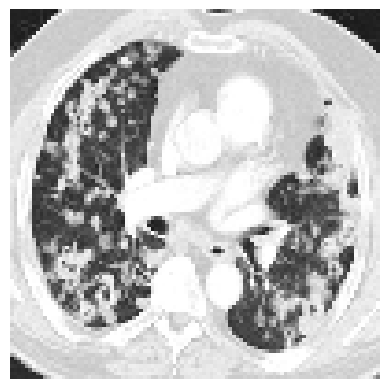

1/1 [==============================] - 1s 802ms/step
Result     :  [[4.0315804e-01 4.5980375e-02 3.5801750e-02 5.1502824e-01 9.9173725e-08
  7.1437533e-08 7.1632450e-10 3.6264050e-06 1.1727131e-05 1.7289683e-06
  7.7089990e-06 8.7115922e-07 1.2169487e-06 2.0866519e-06 2.4519145e-06]]
Max Class  :  3
Class Name :  squamous.cell.carcinoma



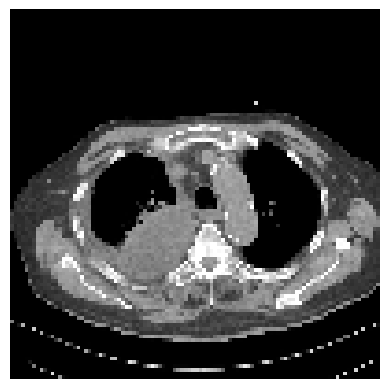

1/1 [==============================] - 0s 215ms/step
Result     :  [[5.8920667e-02 2.6427686e-01 4.9709174e-01 1.7962971e-01 6.2730624e-07
  1.1860732e-08 2.2757514e-09 1.5938800e-05 2.5555064e-05 3.7634961e-06
  2.4854025e-05 1.9629313e-06 3.8956546e-06 1.0503697e-06 3.4012189e-06]]
Max Class  :  2
Class Name :  large.cell.carcinoma



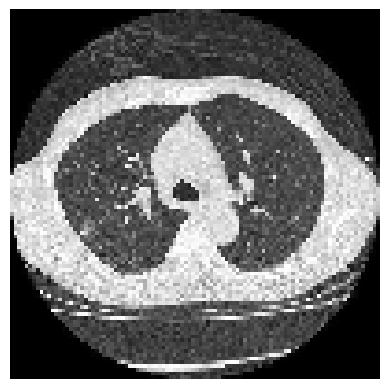

1/1 [==============================] - 0s 138ms/step
Result     :  [[1.0374322e-01 4.7172070e-03 8.7599283e-01 1.4955714e-02 1.9444237e-06
  1.5275148e-08 6.1304095e-09 5.1800348e-06 5.2872446e-04 1.5263144e-05
  3.1758955e-05 2.7488969e-07 9.8210342e-07 6.1196120e-06 8.5477137e-07]]
Max Class  :  2
Class Name :  large.cell.carcinoma



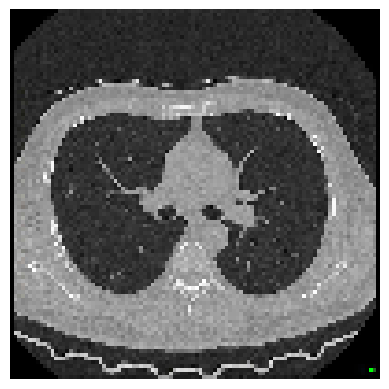

1/1 [==============================] - 0s 140ms/step
Result     :  [[2.29997467e-02 3.41617428e-02 9.29590285e-01 1.26615865e-02
  5.14922567e-06 1.14374423e-07 4.11880663e-08 4.55984882e-05
  3.26233479e-04 2.30344376e-05 1.01087709e-04 8.78390438e-06
  2.56418643e-05 3.10056821e-05 1.99688930e-05]]
Max Class  :  2
Class Name :  large.cell.carcinoma



In [11]:
img_paths = ['img-test-1.jpg',
             'img-test-2.jpg',
             'img-test-3.jpg',
             'img-test-4.jpg'
             
             ]
class_names = ['normal', 'adenocarcinoma', 'large.cell.carcinoma','squamous.cell.carcinoma']


for filename in img_paths:
  img = image.load_img(filename, target_size=(100, 100))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)

  img_batch = img_batch / 255.0

  prediction_inf = model.predict(img_batch)
  result_max_proba = prediction_inf.argmax(axis=-1)[0]
  result_class = class_names[result_max_proba]

  print('Result     : ', prediction_inf)
  print('Max Class  : ', result_max_proba)
  print('Class Name : ', result_class)
  print('')